 # <p style="color: blue;"> House Price Prediction using ANNton">Learn More</a>
    </div>

</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Housing Price Prediction Project</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            background-color: #f4f4f4;
            color: #333;
        }
        h1 {
            color: blue; /* Title color */
        }
        h2 {
            color: green; /* Subtitle color */
        }
        h3 {
            color: orange; /* Sub-subtitle color */
        }
        p {
            margin-bottom: 10px;
            color: #333; /* Paragraph text color */
        }
        .content {
            background-color: #fff;
            padding: 20px;
            border-radius: 5px;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
        }
        .tags, .license {
            background-color: #ecf0f1;
            padding: 10px;
            border-radius: 5px;
            display: inline-block;
            margin-top: 10px;
        }
        .license {
            color: #8e44ad; /* License text color */
        }
        .tags {
            color: #d35400; /* Tags text color */
        }
    </style>/head>
<body>
    <div class="content">
        <h1>Housing Price Prediction Project</h1>
        <h2>Description</h2>
        <p>
            A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small, yet its complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles and build a decent predictive model?
        </p>

        <h2>Acknowledgement</h2>
        <p>
            Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.<br>
            Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.
        </p>

        <h2>Objective</h2>
        <p>
            Understand the dataset and clean it up (if required). Build regression models to predict the sales with respect to a single and multiple features. Also, evaluate the models and compare their respective scores like R<sup>2</sup>, RMSE, etc.
        </p>

        <h3>Usability</h3>
        <p>10.00</p>

        <div class="license">
            <strong>License:</strong> CC0: Public Domain
        </div>

        <h3>Expected Update Frequency</h3>
        <p>Annually</p>

        <div class="tags">
            <strong>Tags:</strong> Real Estate
        </div>
    </div>
</body>
</html>



In [48]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot  as plt 
import seaborn as sns 
import scipy as py 
import sweetviz as sv


import tensorflow as tf  
from tensorflow import keras 
from keras import Sequential  
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
# from keras_tuner import RandomSearch


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


from tensorflow.keras.callbacks import EarlyStopping


from scikeras.wrappers import KerasClassifier

In [2]:
HousePrice_prediction = pd.read_csv('Housing.csv')
HousePrice_prediction.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
173,5250000,5300,4,2,1,yes,no,no,no,yes,0,yes,unfurnished
169,5250000,6540,4,2,2,no,no,no,no,yes,0,no,semi-furnished
473,3003000,8050,2,1,1,yes,no,no,no,no,0,no,unfurnished
232,4655000,3745,3,1,2,yes,no,yes,no,no,0,no,furnished
484,2870000,3040,2,1,1,no,no,no,no,no,0,no,unfurnished


In [3]:
# Generate the report
report = sv.analyze(HousePrice_prediction)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
HousePrice_prediction.shape 

(545, 13)

In [5]:
print(HousePrice_prediction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
no_values = HousePrice_prediction.isnull().sum()
print(f"here we printing the no values {no_values}")

here we printing the no values price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
duplicated = HousePrice_prediction.duplicated().sum()
print(f"The total duplicted value  : {duplicated}")

The total duplicted value  : 0


In [8]:
HousePrice_prediction.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
HousePrice_prediction.describe().corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.996090,-0.431419,-0.433847,-0.434208,-0.434661
area,0.996090,1.000000,-0.362182,-0.364599,-0.364995,-0.365360
bedrooms,-0.431419,-0.362182,1.000000,0.999992,0.999994,0.999985
bathrooms,-0.433847,-0.364599,0.999992,1.000000,0.999998,0.999997
stories,-0.434208,-0.364995,0.999994,0.999998,1.000000,0.999996
parking,-0.434661,-0.365360,0.999985,0.999997,0.999996,1.000000


# applying the eda 

In [10]:
HousePrice_prediction.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\3448848390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=HousePrice_prediction, x=column, palette='Set2', edgecolor='black', ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\3448848390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=HousePrice_prediction, x=column, palette='Set2', edgecolor='black', ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\3448848390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=HousePrice_prediction, x=colum

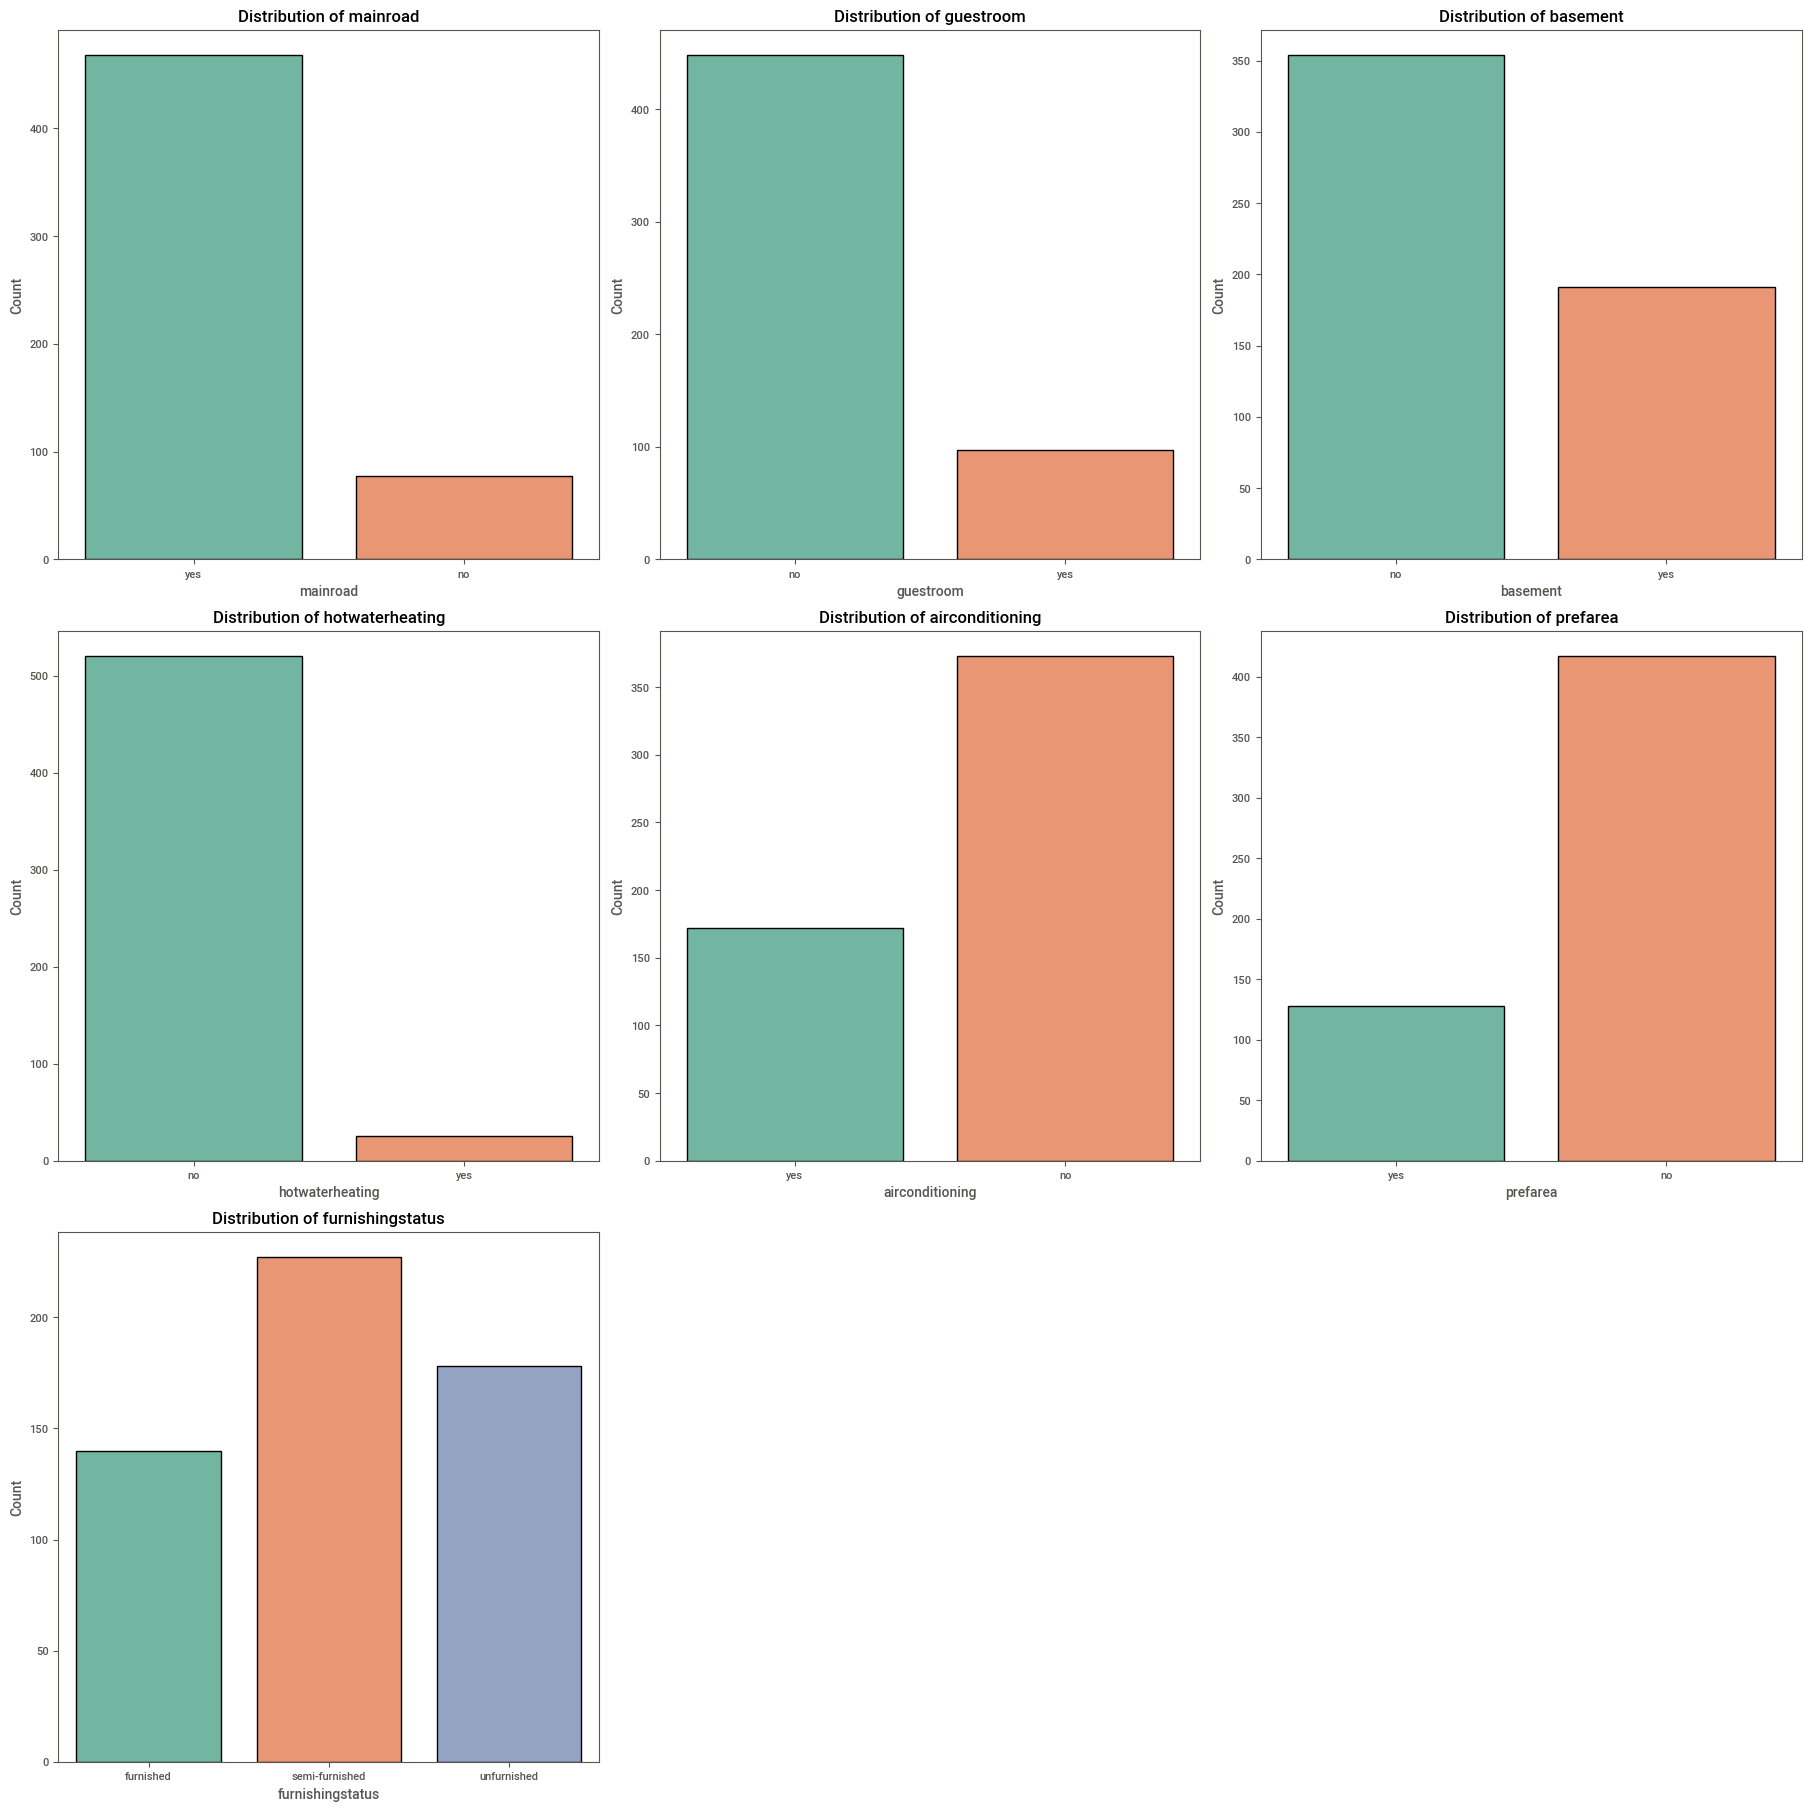

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
categorical_columns = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=HousePrice_prediction, x=column, palette='Set2', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


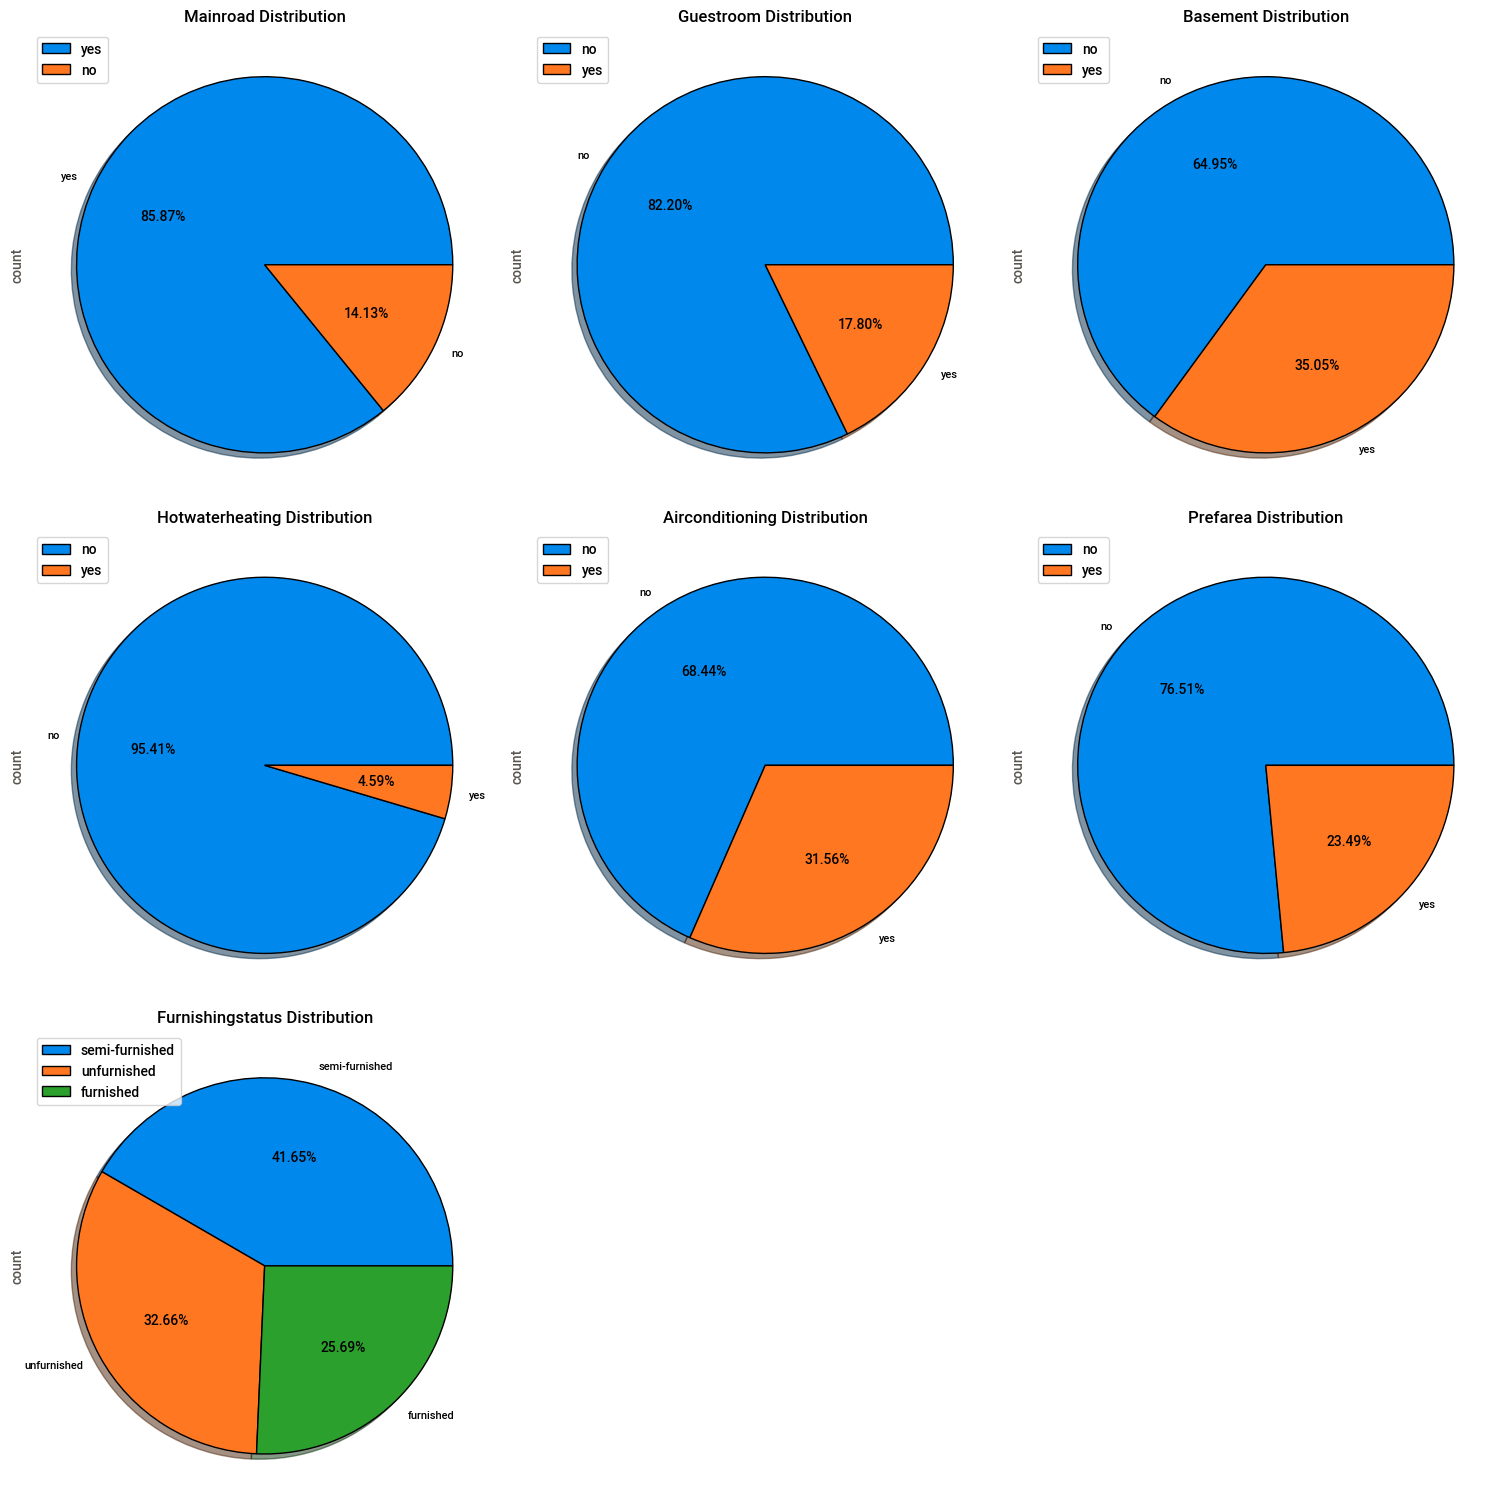

In [12]:
categorical_columns = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]



n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    HousePrice_prediction[column].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, wedgeprops={'edgecolor': 'black'}, ax=ax)
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.legend(loc='upper left')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [13]:
HousePrice_prediction.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\391335923.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=HousePrice_prediction, x=column, palette='Set2', ax=axes[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\391335923.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=HousePrice_prediction, x=column, palette='Set2', ax=axes[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\391335923.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=HousePrice_prediction, x=column, palette='Set2', ax=axes[i])
No artists with labe

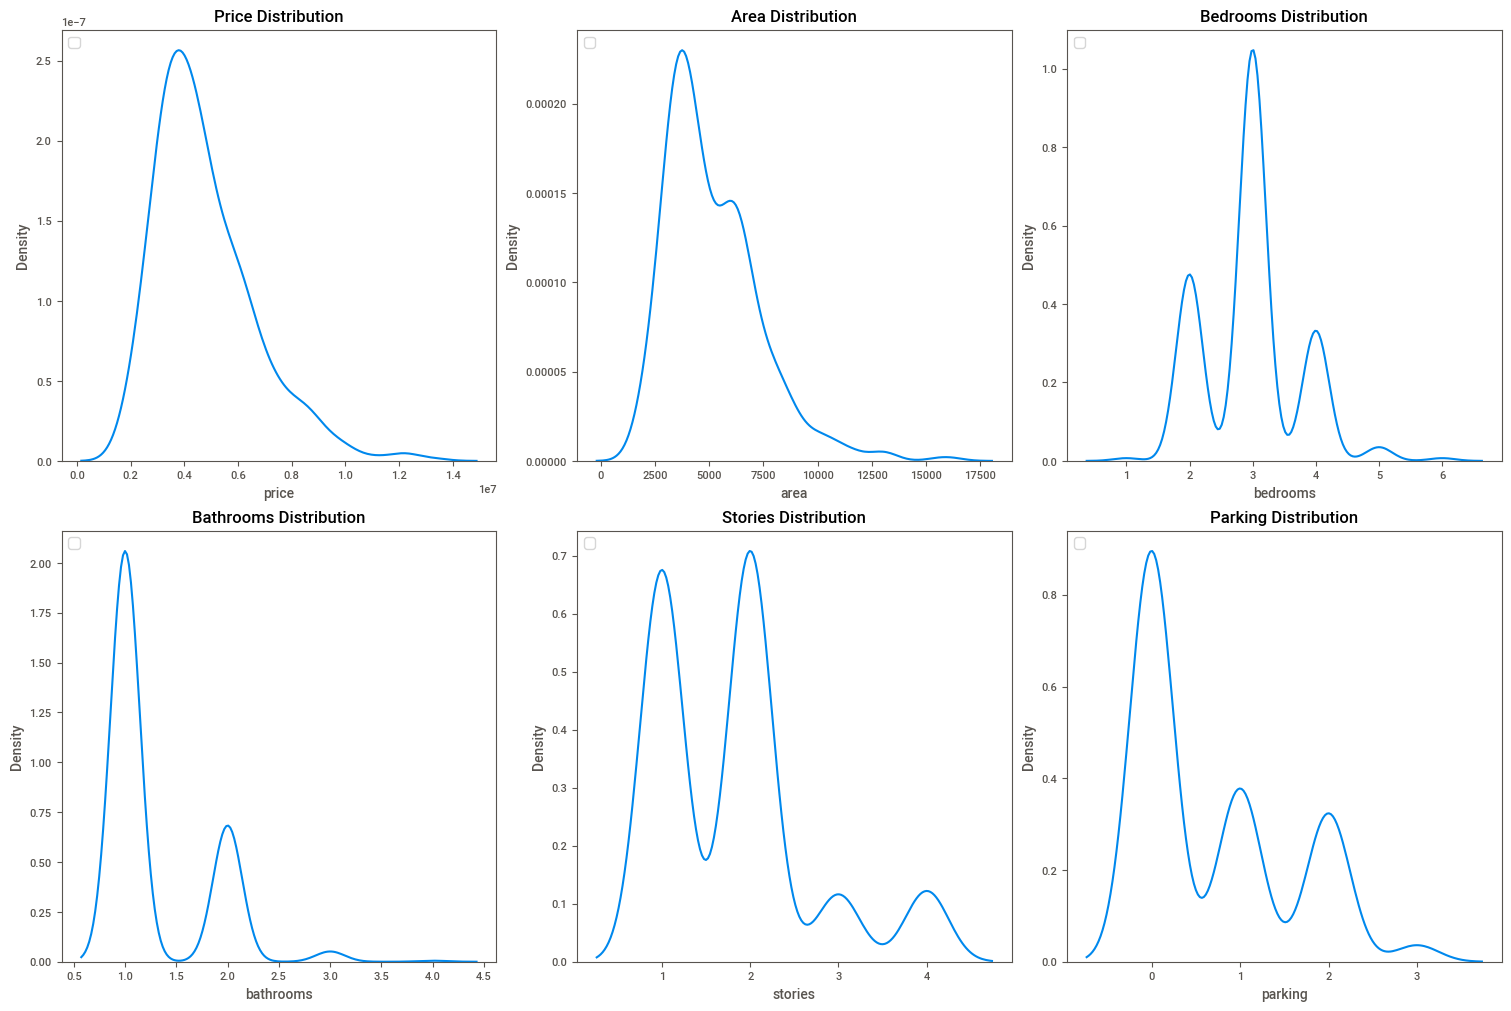

In [14]:
categorical_columns = [
    'price', 'area', 'bedrooms',
    'bathrooms', 'stories',
    'parking'
]



n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.kdeplot(data=HousePrice_prediction, x=column, palette='Set2', ax=axes[i])
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.legend(loc='upper left')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

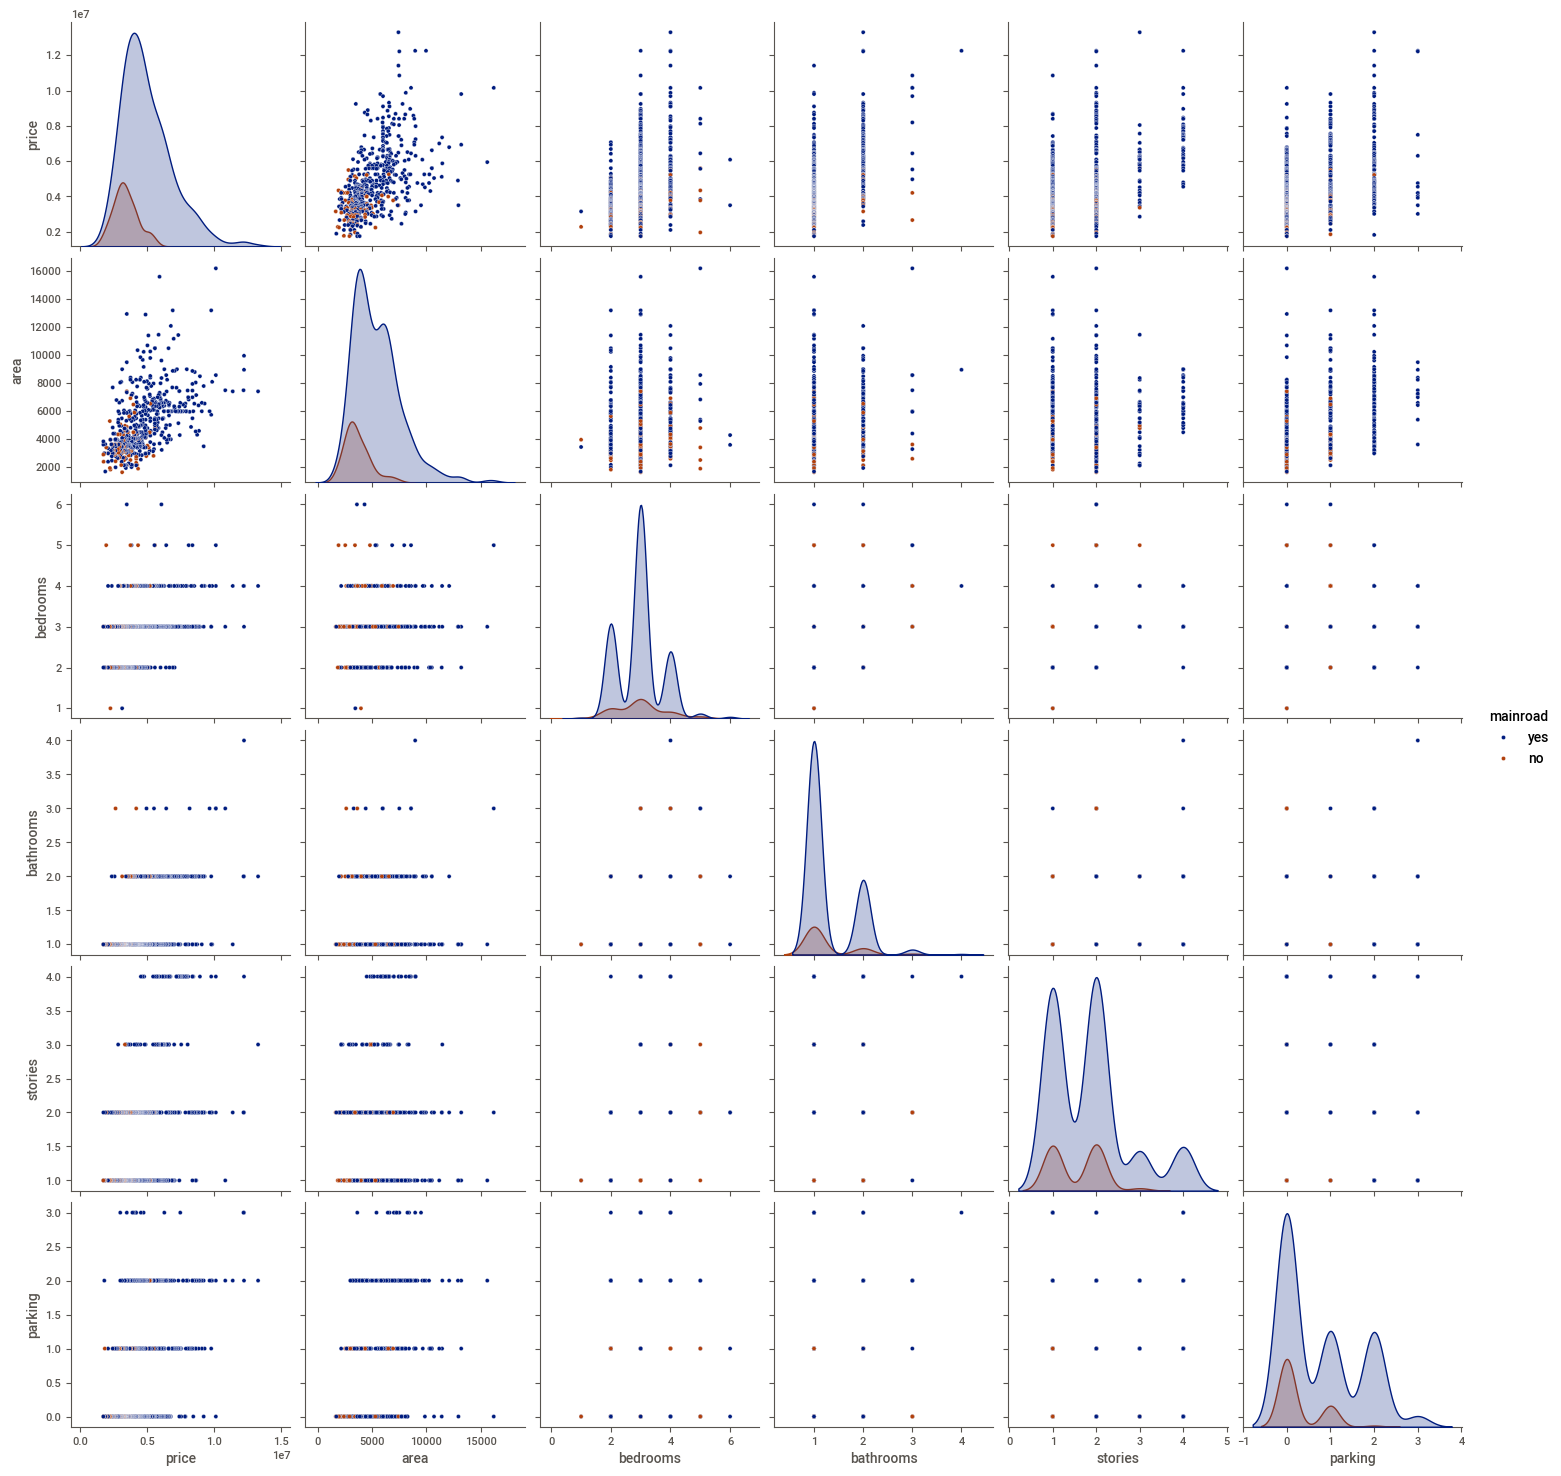

In [15]:
# fist we applying the pair polt
sns.pairplot(HousePrice_prediction,hue = 'mainroad',palette='dark')
plt.show()

In [16]:
correlation_matrix = HousePrice_prediction.describe().corr()
correlation_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.996090,-0.431419,-0.433847,-0.434208,-0.434661
area,0.996090,1.000000,-0.362182,-0.364599,-0.364995,-0.365360
bedrooms,-0.431419,-0.362182,1.000000,0.999992,0.999994,0.999985
bathrooms,-0.433847,-0.364599,0.999992,1.000000,0.999998,0.999997
stories,-0.434208,-0.364995,0.999994,0.999998,1.000000,0.999996
parking,-0.434661,-0.365360,0.999985,0.999997,0.999996,1.000000


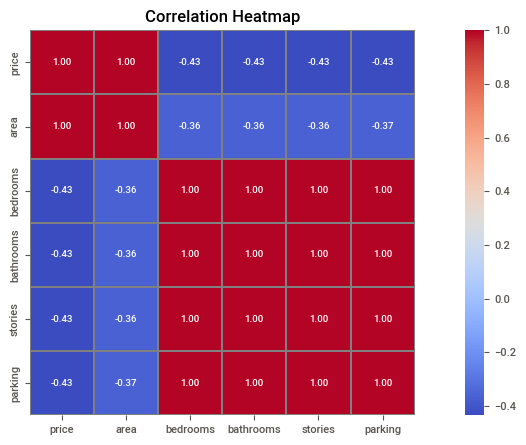

In [17]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

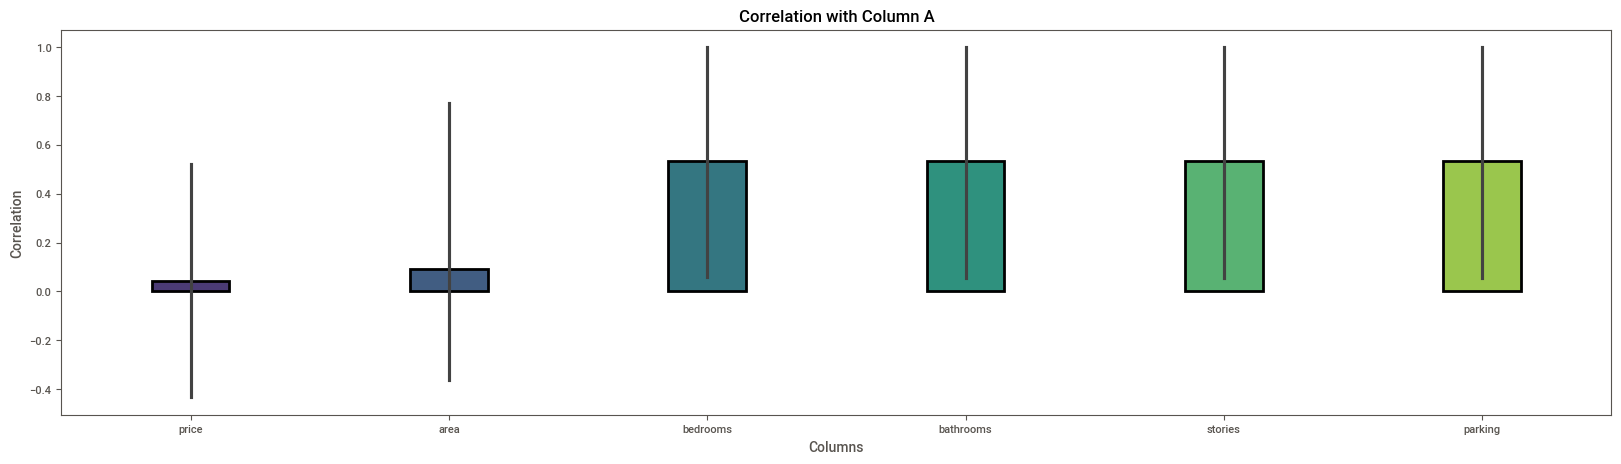

In [18]:
plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,width=0.3)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


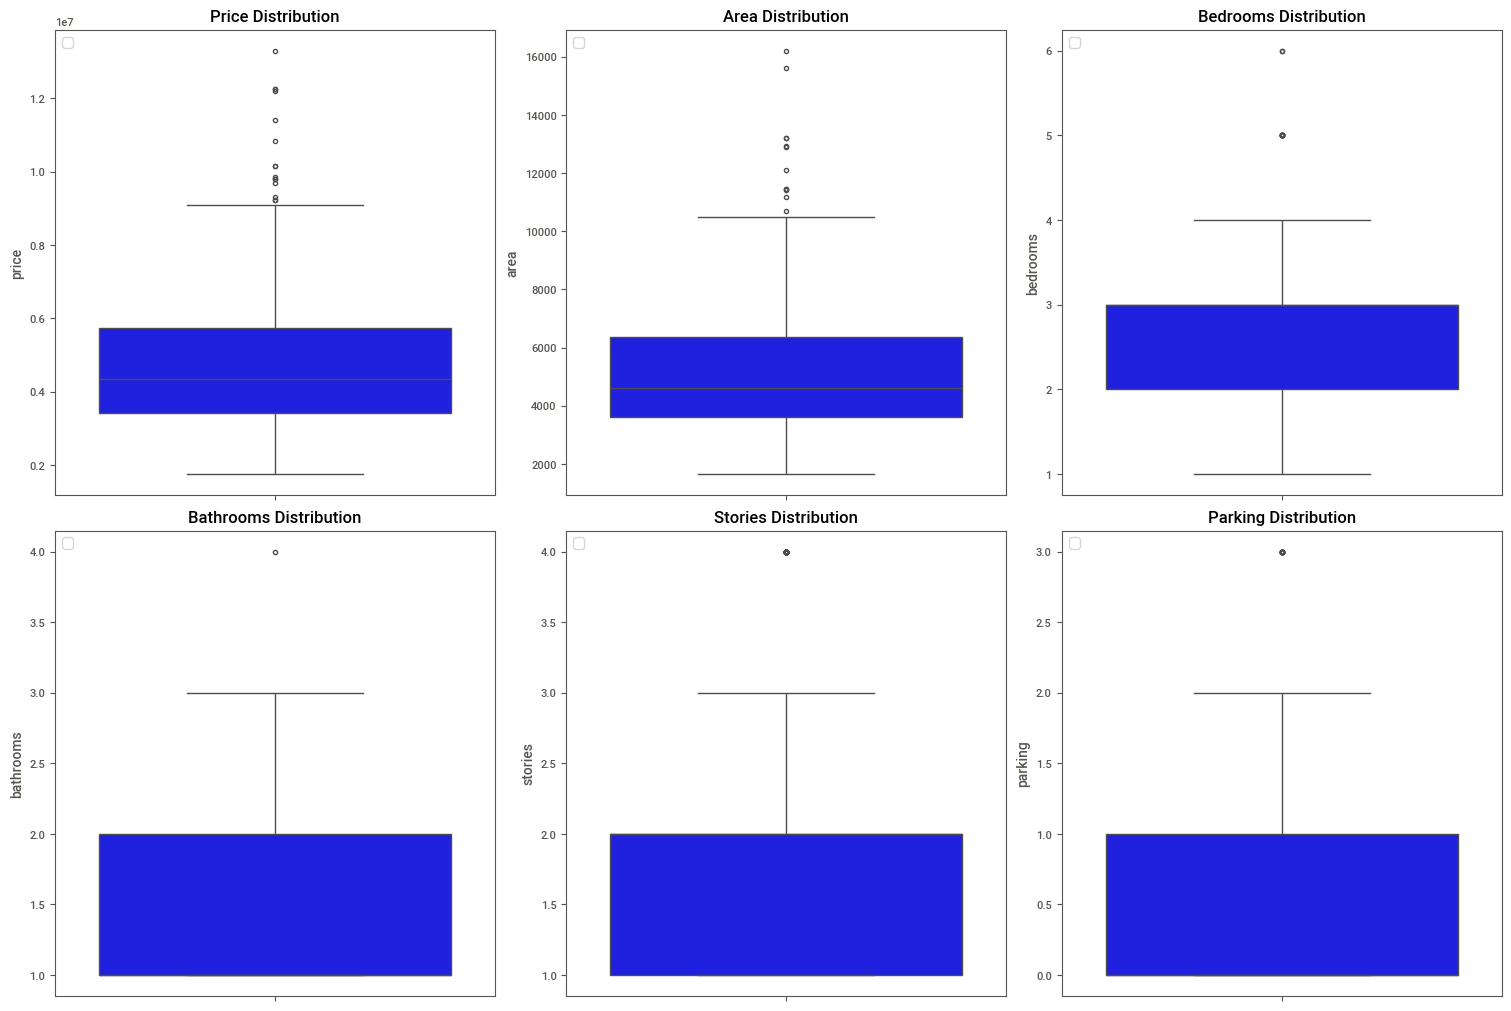

In [19]:
categorical_columns = [
    'price', 'area', 'bedrooms',
    'bathrooms', 'stories',
    'parking'
]



n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.boxplot(HousePrice_prediction[column], color="blue", ax=axes[i])
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.legend(loc='upper left')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()




# model bulding 

In [20]:
HousePrice_prediction.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Group Analysis

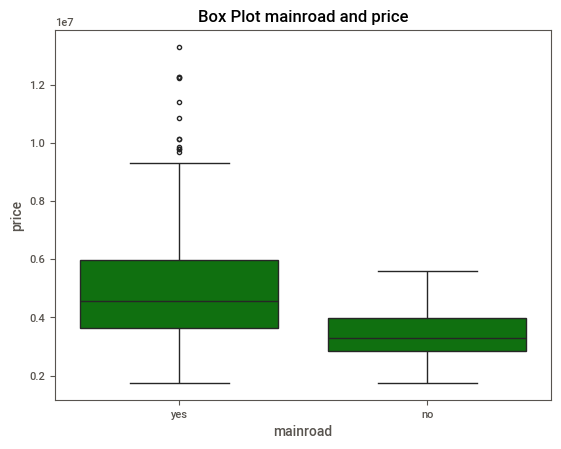

In [21]:
# Box Plot: Visualize distribution of 'sepal_width' across different species
sns.boxplot(x='mainroad', y='price', data=HousePrice_prediction,color = 'g')
plt.title('Box Plot mainroad and price')
plt.show()

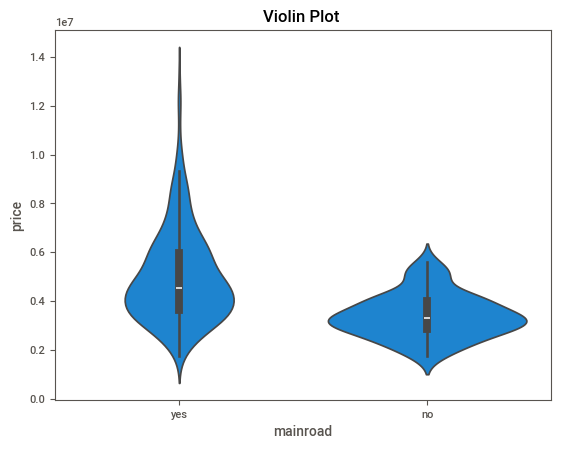

In [22]:
# Violin Plot: Visualize distribution of 'sepal_width' across different species
sns.violinplot(x='mainroad', y='price', data=HousePrice_prediction)
plt.title('Violin Plot ')
plt.show()


# model making 

In [23]:
HousePrice_prediction.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
x = HousePrice_prediction.drop(columns=['price'])
y = HousePrice_prediction['price']

In [25]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [28]:
x_train.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
272,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished
40,6550,3,1,2,yes,no,yes,no,yes,0,yes,furnished
326,4100,4,1,1,no,no,yes,no,no,0,no,unfurnished


In [29]:
x_test.head(4)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,6240,4,2,2,yes,no,no,no,yes,1,no,furnished
247,8400,4,1,4,yes,no,no,no,no,3,no,unfurnished
142,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
107,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished


In [30]:
y_train.head(4)

272    4340000
40     7875000
326    3990000
441    3220000
Name: price, dtype: int64

In [31]:
y_test.head(5)

62     7070000
247    4550000
142    5600000
107    6125000
483    2940000
Name: price, dtype: int64

In [32]:
# Example: Assume you have numerical and categorical features
numerical_features = ['area', 'bedrooms','bathrooms','stories','parking']
categorical_features = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

In [33]:
# Preprocessing for numerical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

In [34]:
# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [41]:
# Fit the preprocessor
preprocessor.fit(x_train)

# Get the input shape after fitting the preprocessor
input_shape = preprocessor.transform(x_train).shape[1]


In [56]:
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Example for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [58]:
model.summary()

NameError: name 'model' is not defined

In [62]:
from scikeras.wrappers import KerasClassifier

# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap the model for use in scikit-learn
nn_model = KerasClassifier(build_fn=create_nn_model, input_shape=preprocessor.transform(x).shape[1], epochs=100, batch_size=32)


In [63]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('nn', nn_model)
])

In [64]:
# Example: Fit the model
pipeline.fit(x_train, y_train)


Epoch 1/100


x:\Users\ASUS\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0013 - loss: -23.4703    
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0015 - loss: -119.1558    
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0048 - loss: -385.5772     
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 6.3968e-04 - loss: -1194.2698
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 6.3968e-04 - loss: -3759.8799 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0018 - loss: -10497.5527    
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0031 - loss: -29679.9395     
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0069 - loss: -70330.6328 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0026 - loss: -172765.1094     
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0031 - loss: -356800.8438     
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 3.0581e-04 -

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('nn',
                 KerasClassifier(batch_size=32, build_fn=<function create_nn_model at 0x000002942210D1C0>, epochs=100, input_shape=20))])

In [52]:
y_pred = pipeline.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [53]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 13250792183486.238
Mean Absolute Error (MAE): 3008587.1559633026
Root Mean Squared Error (RMSE): 3640163.7577842893
R^2 Score: -2.1555549525602617


In [65]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

NameError: name 'history' is not defined